In [1]:
import tensorflow as tf
import numpy as np

In [2]:
model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)

96116736/96112376 [==============================] - 24s 0us/step


In [3]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [4]:
model_tb = tf.keras.callbacks.TensorBoard(log_dir='lab8-inceptonv3')
model_tb.set_model(model)


In [5]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

In [7]:
def read_img(img_path, resize=(299,299)):
    img = tf.io.read_file(img_path)
    img_decode = tf.image.decode_image(img)
    img_decode = tf.image.resize(img_decode, resize)
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode  

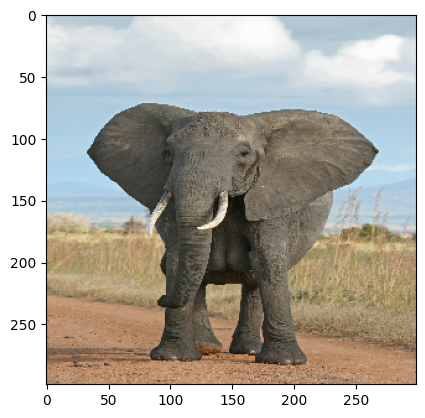

In [14]:
import matplotlib.pyplot as plt

img_path = 'elephant.jpg'
img = read_img(img_path)
plt.imshow(img[0]/255)

In [15]:
img = preprocess_input(img)
pred = model.predict(img)
print('Predicted:', decode_predictions(pred, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02504458', 'African_elephant', 0.8037859), ('n01871265', 'tusker', 0.12163948), ('n02504013', 'Indian_elephant', 0.0042992732)]


In [16]:
import tensorflow_hub as hub

In [17]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/inception-v3/TensorFlow2/classification/2", input_shape=(299,299,3), output_shape=(1001, ), name='Inception_v3')
])
m.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inception_v3 (KerasLayer)    (None, 1001)              23853833  
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


In [18]:
def read_img(img_path, resize=(299,299)):
    img = tf.io.read_file(img_path)
    img_decode = tf.image.decode_image(img)
    img_decode = tf.image.resize(img_decode, resize)
    img_decode = img_decode / 255.0
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode

In [19]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
with open(labels_path) as f:
    labels = f.read().splitlines()

print(labels)
imagenet_labels = np.array(labels)

16384/10484 [==============================================] - 0s 0us/step
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', '

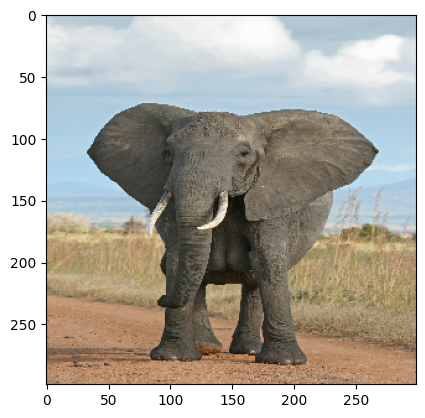

In [20]:
img_path = 'elephant.jpg'
img = read_img(img_path)
plt.imshow(img[0])


In [22]:
pred = m.predict(img)
index = np.argmax(pred)
print('Predicted:', imagenet_labels[index]) 

Predicted: African elephant


In [23]:
top3_index = np.argsort(pred)[0, ::-1][:3]
print('Top 3:', imagenet_labels[top3_index])

Top 3: ['African elephant' 'tusker' 'Indian elephant']
